In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.nn as nn
from torch import nn, optim
from torch.utils.data import DataLoader
import torchvision.transforms as tsf
MSE_loss = torch.nn.MSELoss()

# Cuadrados mínimos: Solución Analítica

Si proponemos una funcion de prediccion lineal $\mathbf Y= \Phi \theta + {\boldsymbol \varepsilon }$, donde $\mathbf\theta$ es el vector de parámetros,

$\mathbf\varepsilon$ es el vector de ruido y $\Phi$ es la matriz del modelo, 

$$\Phi = \left( \begin{array}{c} \phi _1^\top \\  \phi _2^\top \\  \vdots \\  \phi _{n}^ T \end{array} \right)$$

el estimador que minimiza el erro cuadrático medio MSE, $$V(\theta) =\frac{1}{2} \| Y - \Phi \theta \| _2^2 $$ esta definido por $$ \Phi ^ T \Phi \hat{\theta } = \Phi ^ T \mathbf Y,\qquad \hat{\theta } = (\Phi ^ T \Phi )^{-1} \Phi ^ T \mathbf Y$$ 



## Calcular $\theta$ con la solución analítica     

### Ejemplo 1: Datos sintéticos
A partir de una lista de valores $\{y(0),y(1),...,y(T)\}$, asumimos que se generaron de acuerdo a la regla $$\displaystyle  \displaystyle y(t) = a_1 y(t-1)+a_2 y(t-2) + \epsilon(t),$$ tenemos que aprender $\{a_1,a_2\}$ usando cuadrados mínimos.

400

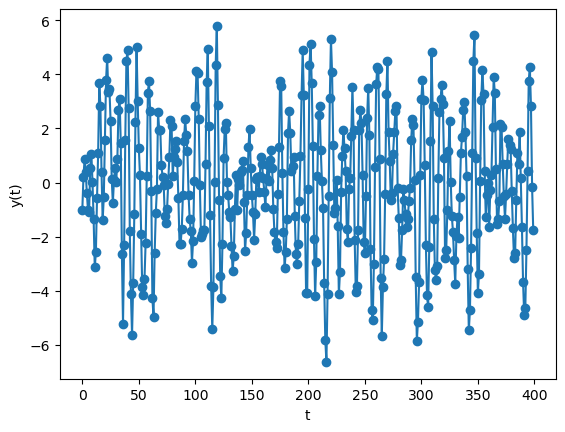

In [3]:
y = torch.load('ar2.pt',weights_only=True)  # cargamos la lista {y(t)}
plt.xlabel('t'); plt.ylabel('y(t)');
plt.plot(y,marker='o')
len(y)

#### A) Escribir los datos en forma amena a cuadrados mínimos y construya la matriz del modelo $\Phi$.

$$\displaystyle  \displaystyle y(2) = a_1 y(1)+a_2 y(0) + \epsilon(2),$$
$$\displaystyle  \displaystyle y(3) = a_1 y(2)+a_2 y(1) + \epsilon(3),$$
$$...$$    
$$\displaystyle  \displaystyle y(T) = a_1 y(T-1)+a_2 y(T-2) + \epsilon(T),$$    

Apilamos nuestras expresiones para construir una forma matricial
$$\begin{split}  y(t) \sim \phi (t)^\top \theta \\ y(t-1) \sim \phi (t-1)^\top \theta \\ \vdots \\ y(i) \sim \phi (i)^\top \theta \\ \end{split} \qquad \longleftrightarrow \qquad \begin{split} \begin{pmatrix}  y(t) \\ y(t-1) \\ \vdots \\ y(i) \end{pmatrix}& \sim \begin{bmatrix}  -& \phi (t)^\top ~ & - \\ -& \phi (t-1)^\top ~ & - \vdots & \\ -&  ~ \phi (i)^\top ~  & - \end{bmatrix} \theta \end{split}$$

Definimos (completar los $...$ y los $?$)
$$Y \displaystyle = \begin{bmatrix}  y(...) \\ \vdots \\ y(...) \end{bmatrix} \in \mathbb R^{?}\quad \text {y} \quad \theta = \begin{bmatrix}  ? \\ \vdots \\ ? \end{bmatrix}, \quad \Phi = \begin{bmatrix}  -& \phi (...)^\top ~ & - \\ & \vdots & \\ -&  ~ \phi (...)^\top ~  & - \end{bmatrix} \in \mathbb R^{? \times ?},\quad \phi (t)= \begin{bmatrix}  ? \\ \vdots \\ ? \end{bmatrix}. $$

#### ¿La matriz del modelo $\Phi$ y el vector $Y$ son?

In [3]:
# Escriba su código abajo
Phi = ...
Y   = ...

####    B) Implementar la solución analítica, el vector de parámetros $\theta$ es?

In [4]:
# Escriba su código abajo
Theta = ...
print('Theta.T = (ai,aj):',...)

Theta.T = (ai,aj): Ellipsis


####    C) Calcular el error cuadrático medio 

In [5]:
# Escriba su código abajo
MSE = ...
print('MSE:',MSE)

MSE: Ellipsis


####    D) Asumimos un modelo diferente  

Si asumimos ahora que el modelo es 
$$\displaystyle  \displaystyle y(t) = c + a_1 y(t-1)+a_2 y(t-2) + \epsilon(t).$$
Llamemos modelo B a este modelo y al modelo anterior modelo A.

Escriba la matriz del modelo $\Phi$ y calcule el vector de parámetros $\theta$ para ello completar los $...$ y los $?$

$$Y \displaystyle = \begin{bmatrix}  y(...) \\ \vdots \\ y(...) \end{bmatrix} \in \mathbb R^{?}\quad \text {y} \quad \theta = \begin{bmatrix}  ? \\ \vdots \\ ? \end{bmatrix}, \quad \Phi = \begin{bmatrix}  -& \phi (...)^\top ~ & - \\ & \vdots & \\ -&  ~ \phi (...)^\top ~  & - \end{bmatrix} \in \mathbb R^{? \times ?},\quad \phi (t)= \begin{bmatrix}  ? \\ \vdots \\ ? \end{bmatrix}. $$

Calcular el error cuadrático medio. ¿Qué el MSE sea menor implica que estamos frente a un mejor modelo?

In [6]:
# Escriba su código abajo
Phi = ...
Y = ...
Theta = ... # torch.inverse(Phi.T @ Phi) @ Phi.T @ Y
MSE = ...

####    E) ¿Cuál es el mejor modelo?
Separe los datos en $Train$ y $Validation$ y use validación cruzada para determinar qué modelo es mejor.

In [7]:
# Escriba su código abajo
y_train, y_val = ..., ...

In [8]:
# Modelo A
Phi = ...
Y = ...
Theta = ... # torch.inverse(Phi.T @ Phi) @ Phi.T @ Y
MSE_train_MA = ...
MSE_val_MA = ...

In [9]:
# Modelo B
Phi = ...
Y = ...
Theta = ... # torch.inverse(Phi.T @ Phi) @ Phi.T @ Y
MSE_train_MB = ...
MSE_val_MB = ...

### Ejemplo 1b. $\,$ Datos sintéticos
Vamos a fitear un polinomio $p(t)$ de grado $<n$ a partir de una lista de valores $\{(t_i,y_i)\}_{i=1,...,m}$, asumimos que se generaron de acuerdo a la regla $$ y(t) = \underbrace{a_0 + a_1 t + a_2 t^2+...+a_{n-1}t^{n-1}}_{p(t)=?} + \epsilon(t),$$ tenemos que aprender $\{a_i\}_{i=0,...,n-1}$ usando cuadrados mínimos.

100

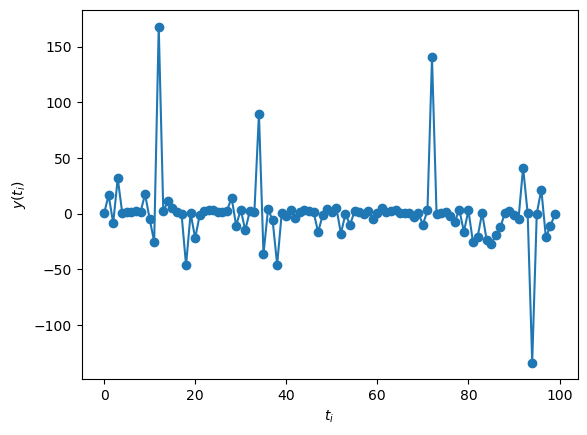

In [10]:
ti, yi = torch.load('poly.pt',weights_only=True)  # cargamos la lista {y(t)}
plt.xlabel('$t_i$'); plt.ylabel('$y(t_i)$');
plt.plot(yi,marker='o')
len(yi)

#### A) Escribir los datos en forma amena a cuadrados mínimos y construya la matriz del modelo $\Phi$.

$$\begin{split}  y(t_1) = a_0 + a_1t_1 + a_2 t_1^2+ a_3 t_1^3 + \epsilon(1),\\ y(t_2) = a_0 + a_1t_2 + a_2 t_2^2+ a_3 t_2^3 + \epsilon(2),\\
...\\ y(t_T) = a_0 + a_1t_T + a_2 t_T^2+ a_3 t_T^3 + \epsilon(T),\\ \end{split} \quad 
\longleftrightarrow \quad 
Y,\, \Phi,\,\theta = \begin{bmatrix} y_1 \\y_2\\ \vdots \\ y_{T} \end{bmatrix},\, \begin{bmatrix}
1 & t_1 & t_1^2 & \cdots & t_1^{n-1} \\
1 & t_2 & t_2^2 & \cdots & t_2^{n-1} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & t_T & t_T^2 & \cdots & t_T^{n-1} \\
\end{bmatrix},\, \begin{bmatrix} a_0 \\a_1\\ \vdots \\ a_{n-1} \end{bmatrix}$$

$\Phi$ es la Matriz de Vandermonde, y se sabe que es full rank.

##### ¿Qué valor de $n$ elegimos?


In [8]:
# Escriba su código abajo
# Elijo un valor de n = ...
n=4
ti_train, yi_train = ...,...
ti_val,   yi_val   =  ...,...

Phi = ... #torch.stack([torch.ones(len(ti_train))]+[ti_train**j for j in range(1,n)]).T
Y = yi_train

####    B) Implementar la solución analítica, el vector de parámetros $\theta$ es?

In [10]:
# Escriba su código abajo
if 1:   # Regularización
    Theta = ...# torch.inverse(Phi.T @ Phi-...) @ Phi.T @ Y
else:
    Theta = ...# torch.inverse(Phi.T @ Phi) @ Phi.T @ Y
print('Theta.T = {ai}',Theta)

Theta.T = {ai} Ellipsis


####    C) Calcular el error cuadrático medio 

In [13]:
# Escriba su código abajo
MSE = ...
print('MSE [Training]:',MSE)

Phi_val = ... #torch.stack([torch.ones(len(ti_val))]+[ti_val**j for j in range(1,n)]).T
MSE_val = ... 
print('MSE [Validation]:',MSE_val)

MSE [Training]: 1.05
MSE [Validation]: 1.0


####    E) ¿Cuál es el mejor modelo?
Separe los datos en $Train$ y $Validation$ y use validación cruzada para determinar qué modelo es mejor.

Text(0.5, 0, 'n')

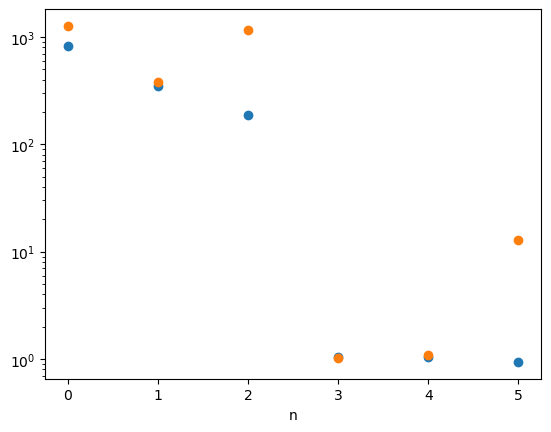

In [14]:
# Escriba su código abajo
MSE_train, MSE_val = [], []
for n in range(1,7):
    
    Phi = torch.stack([torch.ones(len(ti_train))]+[ti_train**j for j in range(1,n)]).T
    Theta = torch.inverse(Phi.T @ Phi) @ Phi.T @ Y
    MSE = np.round( MSE_loss(yi_train,Phi @ Theta).item(),2)
    MSE_train.append(MSE)

    # Validación
    Phi_val = torch.stack([torch.ones(len(ti_val))]+[ti_val**j for j in range(1,n)]).T
    MSE = np.round( MSE_loss(yi_val, Phi_val @ Theta).item(),2)
    MSE_val.append(MSE)

plt.scatter(range(len(MSE_train)),MSE_train)
plt.scatter(range(len(MSE_val)),MSE_val)
plt.yscale("log");plt.xlabel('n')

## Ejemplo 2 Horseshoe Crab
Consideramos el estudio de una especie de 450.000.000 años, 

A partir de ciertas características de las hembras de cangrejo de herradura (variables explicatorias $x_1:$peso, $x_2:$ancho, $x_3:$color y $x_4:$la condición de la espina), determinar el número de satélites macho de cangrejo de herradura asumiendo el modelo

$$ y_i = \theta_0 + \theta_1 x_{i1} + \theta_2 x_{i2} + \theta_3 x_{i3} + \theta_4 x_{i4}+\epsilon_i,\quad {con}\quad i=1,2,...,n.$$

In [15]:
crabs = pd.read_fwf('horseshoe_crabs.dat')
#{"y": "Satelites"}
crabs.head()

crab  y  weight  width  color  spine
0     1  8    3.05   28.3      2      3
1     2  0    1.55   22.5      3      3
2     3  9    2.30   26.0      1      1
3     4  0    2.10   24.8      3      3
4     5  4    2.60   26.0      3      3

####    A) Escriba la matriz del modelo

Apilando las observaciones tenemos
$$
y = \begin{pmatrix}
8 \\
0 \\
9 \\
4 \\
\vdots
\end{pmatrix}, \quad
\Phi \theta = \begin{pmatrix}
1 & 3.05 & 28.3 & 2 & 3 \\
1 & 1.55 & 22.5 & 3 & 3 \\
1 & 2.30 & 26.0 & 1 & 1 \\
1 & 2.60 & 24.8 & 3 & 3 \\
\vdots & \vdots & \vdots & \vdots & \vdots
\end{pmatrix}
\begin{pmatrix}
\theta_0 \\
\theta_1 \\
\theta_2 \\
\theta_3 \\
\theta_4
\end{pmatrix}.
$$

In [16]:
# Escriba su código abajo
crabs['ones'] = torch.ones(len(crabs))
Phi = torch.tensor( crabs[['ones','weight','width','color','spine']].values )
Y   = torch.tensor( crabs[['y']].values.astype(float) )
Theta = torch.inverse(Phi.T @ Phi) @ Phi.T @ Y
MSE = np.round( MSE_loss(Y, Phi @ Theta).item(),2)
print('MSE:',MSE)

MSE: 8.41


####    B) Escriba la matriz del modelo que incluya sólo el peso y el color
Teniendo en cuenta la correlación entre las columnas:

In [17]:
print('Correlación\n',crabs[['weight','width','color','spine']].corr())

Correlación
           weight     width     color     spine
weight  1.000000  0.886871 -0.250777 -0.166482
width   0.886871  1.000000 -0.264386 -0.121895
color  -0.250777 -0.264386  1.000000  0.378502
spine  -0.166482 -0.121895  0.378502  1.000000


Vamos a construir un modelo más pequeño con una variable cuantitativa y otra cualitativa, ahora las variables explicatorias son $x_{i1}$ el peso y $x_{i2},x_{i3},x_{i4}$ variables binarias que valen 1 cuando la cangrejo hembra es de color 1,2,3,
$$
\begin{align}
x&=1→(1,0,0),\quad x=2→(0,1,0),\quad x=3→(0,0,1).\qquad \textrm{(One-hot encoding)}
\end{align}
$$
Apilando las observaciones tenemos (teniendo en cuenta la multicolinealidad)



$$
y = \begin{pmatrix}
8 \\
0 \\
9 \\
4 \\
\vdots
\end{pmatrix}, \quad
\Phi \theta = \begin{pmatrix}
1 & 3.05 & 1 & 0 & 0 \\
1 & 1.55 & 0 & 1 & 0 \\
1 & 2.30 & 0 & 0 & 0 \\
1 & 2.60 & 0 & 1 & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots
\end{pmatrix}
\begin{pmatrix}
\theta_0 \\
\theta_1 \\
\theta_2 \\
\theta_3 \\
\theta_4
\end{pmatrix}.
$$

In [18]:
# Escriba su código abajo
crabs['C1'] = (crabs['color'] == 1).astype(int)
crabs['C2'] = (crabs['color'] == 2).astype(int)
crabs['C3'] = (crabs['color'] == 3).astype(int)
Phi = torch.tensor( crabs[['ones','weight','C1','C2','C3']].values )
Y   = torch.tensor( crabs[['y']].values.astype(float) )
Theta = torch.inverse(Phi.T @ Phi) @ Phi.T @ Y
MSE = np.round( MSE_loss(Y, Phi @ Theta).item(),2)
print('MSE:',MSE)

MSE: 8.39


## Ejemplo 3 $\,$  MNIST
Vamos a usar cuadrados mínimos para resolver el problema de clasificación de la base de datos MNIST. 60.000 ejemplos de entrenamiento y 10.000 ejemplos de test. Cada ejemplo comprende una imagen en escala de grises de 28×28 y una etiqueta asociada de una de 10 clases.

De ser necesario utilice algún tipo de regularización.

In [19]:
training_data = datasets.MNIST(root=".",train=True,download=True,transform=ToTensor())
test_data     = datasets.MNIST(root=".",train=False,download=True,transform=ToTensor())

In [20]:
image, label = test_data[0]
image.shape

torch.Size([1, 28, 28])

In [21]:
# Apartamos 10.000 imágenes para validación
train_X, train_y = training_data.data[:50000].float()/255, training_data.targets[:50000].float()
val_X,     val_y = training_data.data[50000:].float()/255, training_data.targets[50000:].float()
test_X,   test_y = test_data.data.float()/255, test_data.targets.float()

#Transformación de flattening:
train_X, train_y = train_X.reshape(len(train_X),28*28), train_y.reshape(-1,1)
val_X,     val_y = val_X.reshape(len(val_X),28*28),     val_y.reshape(-1,1)
test_X,   test_y = test_X.reshape(len(test_X),28*28),   test_y.reshape(-1,1)

In [22]:
# Escriba su código abajo
Phi = train_X
Y   = train_y

try:
    Theta = torch.inverse(Phi.T @ Phi) @ Phi.T @ Y                    # Matriz singular, alta dimensionalidad, etc
    print('Phi.T @ Phi -> Invertible')
except:
    l=0.001
    Theta = torch.inverse(Phi.T @ Phi-l*torch.eye(28*28)) @ Phi.T @ Y # Regresion de Ridge o Lasso
    print('Phi.T @ Phi -> NO Invertible')

# Seleccionamos el MSE como función de pérdida
MSE_loss = torch.nn.MSELoss()
MSE = np.round( MSE_loss(val_y,val_X @ Theta).item(),2)

# Accuracy
matching = val_y.int() == (val_X @ Theta).int()
ACC = np.round(matching.sum().item()/len(val_y)*100,2)

Phi.T @ Phi -> NO Invertible



<details><summary>print( (Phi.T @ Phi)[0] )</summary>

```python
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
```

</details>

In [23]:
print('Resultados de la regresión lineal',len(val_y))
print('len(val_y)->',len(val_y))
print('MSE       ->',MSE)
print('ACC       ->',ACC)

Resultados de la regresión lineal 10000
len(val_y)-> 10000
MSE       -> 3.63
ACC       -> 27.0


In [24]:
# Clasificador aleatorio: baseline

y_rand = val_y.clone()
indices = torch.randperm(y_rand.size(0))
y_rand = y_rand[indices]

# Error cuadrático medio
MSE   = np.round( MSE_loss(val_y,y_rand).item(),2)

# Accuracy
matching = val_y.int() == (y_rand).int()
ACC = np.round(matching.sum().item()/len(val_y)*100,2)

In [25]:
print('Resultados del clasificador aleatorio',len(val_y))
print('MSE       ->',MSE)
print('ACC       ->',ACC)

Resultados del clasificador aleatorio 10000
MSE       -> 16.46
ACC       -> 9.96


# Redes Neuronales

### Ejemplo 4$\,$ MNIST$\,$ FFNN

Vamos a entrenar una FFNN para resolver el problema de clasificación de la base de datos MNIST. 

In [26]:
# Rehacemos la Regresión Lineal
# Nuestro modelo se puede representar como una secuencia de capas 
# sin ramificaciones complejas ni capas compartidas usamos Sequential

model = nn.Sequential(nn.Linear(28*28, 1))
optimizer = torch.optim.SGD(model.parameters(), lr=2e-2, weight_decay=1e-3 ) #  Descenso de gradiente estocástico para actualizar los parámetros

# Entrenamiento
for e in range(2001):
    y_pred = model(train_X)
    loss = MSE_loss(y_pred, train_y)
    if e%200 == 0:   print("EPOCH: %1d, MSE: %.2f" % (e, loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Predicciones
with torch.no_grad():
    y_pred = model(val_X)

# Error cuadrático medio
MSE  = np.round( MSE_loss(val_y,y_pred).item(),2)

# Accuracy
matching = val_y.int() == y_pred.int()
ACC = np.round(matching.sum().item()/len(val_y)*100,2)

EPOCH: 0, MSE: 28.41
EPOCH: 200, MSE: 3.74
EPOCH: 400, MSE: 3.50
EPOCH: 600, MSE: 3.40
EPOCH: 800, MSE: 3.36
EPOCH: 1000, MSE: 3.33
EPOCH: 1200, MSE: 3.31
EPOCH: 1400, MSE: 3.30
EPOCH: 1600, MSE: 3.30
EPOCH: 1800, MSE: 3.29
EPOCH: 2000, MSE: 3.28


In [27]:
print('Resultados del clasificador usando Pytorch',len(val_y))
print('MSE       ->',MSE)
print('ACC       ->',ACC)

Resultados del clasificador usando Pytorch 10000
MSE       -> 3.15
ACC       -> 26.88


## FFNN
- Datos
- Modelo
- Configuración del proceso de aprendizaje

In [28]:
# DATOS
training_data = datasets.MNIST(root=".",train=True,download=True,transform=ToTensor())
test_data     = datasets.MNIST(root=".",train=False,download=True,transform=ToTensor())

batch_size = 64                      # Data loader
train_dl= DataLoader(training_data, batch_size = batch_size)
test_dl = DataLoader(test_data, batch_size=batch_size)

In [29]:
# MODELO

# Usamos Subclases
# el nivel de complejidad siguiente. Se define el flujo del modelo.
# Para modelos de múltiples entradas/salidas, conexiones salteadas, etc.

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.relu    = nn.ReLU()
        self.fci  = nn.Linear(28*28, 512)
        self.fc1  = nn.Linear(512, 512)
        self.fco  = nn.Linear(512, 10)
        

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu( self.fci(x) )
        x = self.relu( self.fc1(x) )  # primera hidden layer
        x = self.fco(x)
        return x

model = NeuralNetwork()
#print(model.parameters())

In [30]:
# CONFIGURACIÓN DEL PROCESO DE APRENDIZAJE
learning_rate = 1e-3                                                 # Hiperparámetro
loss_fn = nn.CrossEntropyLoss()                                      # Loss 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)    # Optimizador

In [31]:
def trainloop (dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X,y) in enumerate(dataloader):
        
        # Cálculo del error
        prediction = model(X)
        loss = loss_fn(prediction, y)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 400 == 0:
            loss, current = loss.item(), batch*len(X)
            print(f'loss:{loss:>7f} [{current:>5d}/{size:>5d}]')

In [32]:
def evaluate (dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X,y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size                                                     # Metrica: Accuracy
    print(f'Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n')

In [ ]:
epochs = 20
for i in range(epochs):
    print(f"Epoch {i+1}\n-------------------------------")
    trainloop(train_dl, model, loss_fn, optimizer)
    evaluate(test_dl, model, loss_fn)
print("Hecho!")

Epoch 1
-------------------------------
loss:2.311289 [    0/60000]
loss:2.288872 [25600/60000]
loss:2.272840 [51200/60000]
Test Error: 
 Accuracy: 27.5%, Avg loss: 2.262547 

Epoch 2
-------------------------------
loss:2.267091 [    0/60000]
loss:2.245117 [25600/60000]
loss:2.218173 [51200/60000]
Test Error: 
 Accuracy: 57.6%, Avg loss: 2.205122 

Epoch 3
-------------------------------
loss:2.208403 [    0/60000]
loss:2.178985 [25600/60000]
loss:2.129649 [51200/60000]
Test Error: 
 Accuracy: 67.0%, Avg loss: 2.109794 

Epoch 4
-------------------------------
loss:2.111251 [    0/60000]
